In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
default = pd.read_csv('credit_card_default.csv')
default.rename(columns=lambda x: x.lower(), inplace=True)
default.rename(columns={'pay_0':'pay_1','default payment next month':'default'}, inplace=True)

default['male'] = (default['sex']==1).astype('int')
default.drop('sex', axis=1, inplace=True)

default['married'] = (default['marriage'] == 1).astype('int')
default.drop('marriage', axis=1, inplace=True)

# For pay_n features if >0 then it means the customer was delayed on that month
pay_features = ['pay_' + str(i) for i in range(1,7)]
for p in pay_features:
    default[p] = (default[p] > 0).astype(int)

In [ ]:
def transform_education(x):
    if x==1: # 1==graduate school, give it a 2
        return 2
    elif x==2: # 2==university, give it a 1
        return 1
    else:
        return -1 # give a negative value to all other levels of education
    
default['education'] = default['education'].apply(transform_education)

In [ ]:
default.groupby(['married','male'])['default'].mean().unstack()

male,0,1
married,,
0,0.197345,0.227979
1,0.219625,0.259345


In [ ]:
for i in range(1,7):
    i = str(i)
    new_var_name = 'bill_minus_pay' + i
    default[new_var_name] = default['bill_amt'+i] - default['pay_amt'+i]

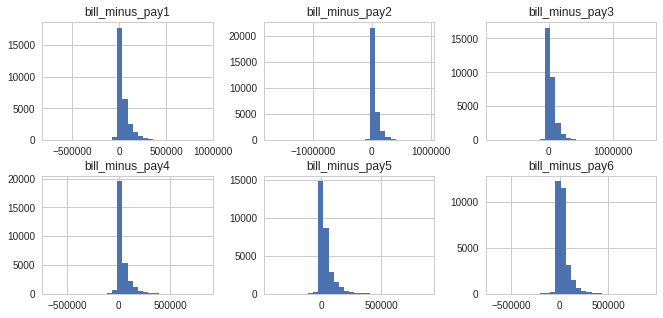

In [ ]:
bill_minus_pay_features = ['bill_minus_pay'+str(i) for i in range(1,7)]
default[bill_minus_pay_features].hist(figsize=(11,5), layout=(2,3), bins=30);

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
bill_amt_features = ['bill_amt'+str(i) for i in range(1,7)]
bill_amt_pca = PCA(n_components=1)
default['bill_amt_new_feat'] = bill_amt_pca.fit_transform(default[bill_amt_features])[:,0]

In [ ]:
pay_features = ['pay_'+str(i) for i in range(2,7)]
pay_features_pca = PCA().fit(default[pay_features])
pay_features_pca.explained_variance_ratio_

array([0.62640566, 0.15478995, 0.10049793, 0.07279835, 0.04550811])

In [ ]:
pay_features_pca = PCA(n_components=2).fit_transform(default[pay_features])
default['new_pay1'] = pay_features_pca[:,0]
default['new_pay2'] = pay_features_pca[:,1]

In [ ]:
# importing data
data_path= 'diamonds.csv'
diamonds = pd.read_csv(data_path)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)

In [ ]:
diamonds.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


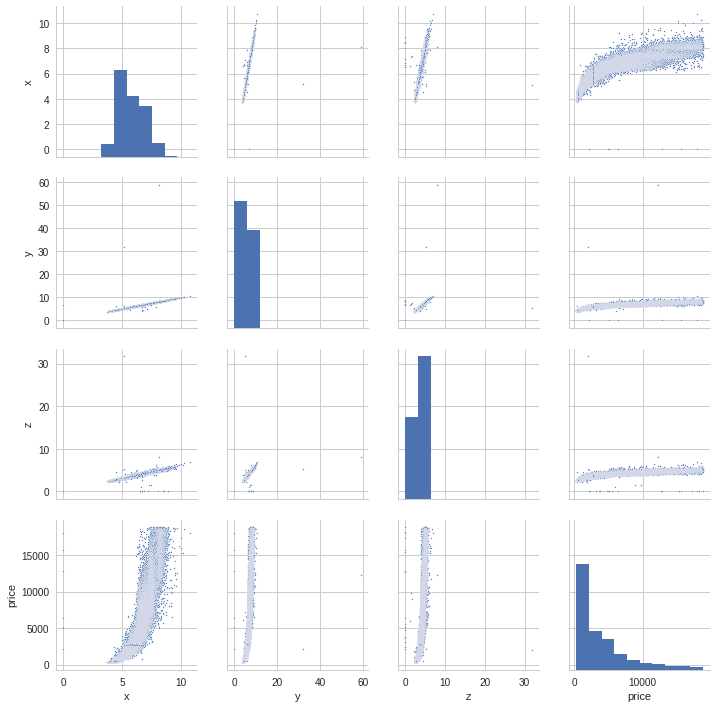

In [ ]:
sns.pairplot(diamonds[['x','y','z','price']], plot_kws={'s':2});

In [ ]:
diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']

In [ ]:
diamonds['density'] = diamonds['carat']/diamonds['volume']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


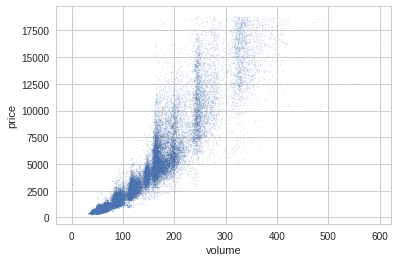

In [ ]:
diamonds[diamonds['volume']<600].plot.scatter(x='volume', y='price', s=1, alpha=0.1);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


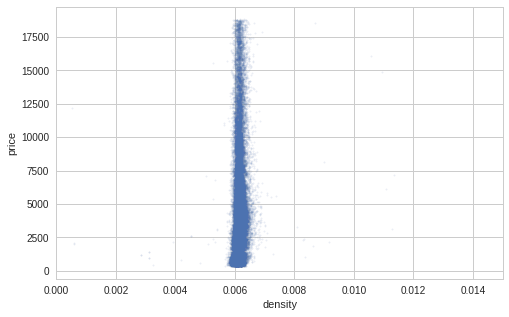

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
diamonds.plot.scatter(x='density', y='price', s=2, alpha=0.1, ax=ax)
ax.set_xlim(0,0.015);

In [ ]:
diamonds[['price','carat','volume','density']].corr()

,price,carat,volume,density
price,1.000000,0.921591,0.902385,0.143440
carat,0.921591,1.000000,0.976308,0.206805
volume,0.902385,0.976308,1.000000,0.128187
density,0.143440,0.206805,0.128187,1.000000
